## Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
%config Completer.use_jedi =False

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [5]:
df = pd.concat([df_train,df_test])

In [743]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [744]:
df.shape

(1309, 12)

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [746]:
df.Survived.value_counts(dropna=False)
# Balanced classes

 0.0    549
NaN     418
 1.0    342
Name: Survived, dtype: int64

In [747]:
df.drop(columns=['PassengerId'], inplace=True)

In [748]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [749]:
df.drop(columns=['Name'], inplace=True)

In [750]:
df.drop(columns=['Ticket'], inplace=True)

In [751]:
df.Sex=df.Sex.map({'male':1, 'female':2})

In [752]:
df.Age.isnull().sum()

263

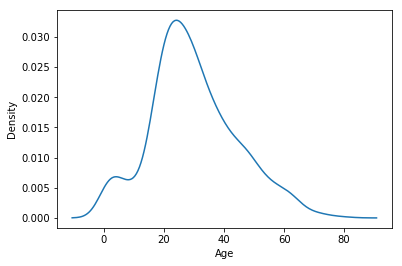

In [753]:
sns.kdeplot(df.Age)

In [754]:
df.Age=df.Age.fillna(df.Age.median())

In [755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int64
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 102.3+ KB


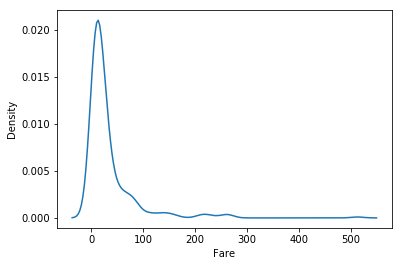

In [756]:
sns.kdeplot(df.Fare)

In [757]:
df.drop(columns=['Cabin'], inplace=True)

In [758]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [759]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [760]:
df.Embarked=df.Embarked.map({'Q':0,'S':1, 'C':2})

In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Age         1309 non-null float64
Embarked    1309 non-null int64
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int64
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 92.0 KB


In [763]:
df.Fare.fillna(df.Fare.mean(), inplace=True)

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

In [765]:
df_train_clean = df.iloc[:891,:]
df_test_clean = df.iloc[891:,:]
df_test_clean.drop(columns=['Survived'], inplace=True)

X = df_train_clean.drop(['Survived'], axis= 1)
y = df_train_clean.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [769]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [770]:
from  datetime import datetime
start_time = int(datetime.now().strftime('%H%M%S'))

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('ADAboost',AdaBoostClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))


import time 


results = []
names = []

print(f'Name of the model ------- -- R2 score ------------ MSE------------- Time taken')

for name, model in models:
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    res = accuracy_score(y_test, y_pred)
     
   # mse = mean_squared_error(y_test, y_pred)
    #results.append((name,res,mse))
    
    
    current_time = int(datetime.now().strftime('%H%M%S'))
    time_taken = current_time - start_time
    start_time = current_time 
    
    print( f' {name:10} {res:30} {time_taken:15}' )

Name of the model ------- -- R2 score ------------ MSE------------- Time taken
 KNN                    0.7254237288135593               1
 XGB                    0.7661016949152543               0
 ADAboost               0.8101694915254237               0
 DecisionTree             0.7389830508474576               0
 RandomForest             0.7864406779661017               0


In [866]:
ada = AdaBoostClassifier()

In [867]:
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [868]:
accuracy_score(y_test, y_pred)

0.8101694915254237

In [869]:
y_pred = ada.predict(df_test_clean)


In [943]:
df_sample = pd.read_csv('gender_submission_init.csv')
df_sample.head()
df_sample['Survived'] = np.int64(y_pred)
df_sample.to_csv('gender_submission.csv', index= False)

In [871]:
df_sample.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

# Score was 75% on kaggle


---- 


# Second trial

----- 
## Now will start analysing the data deeply to increase the accuracy

In [873]:
df = pd.concat([df_train,df_test])

In [874]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


## PassengerId

In [875]:
df.PassengerId.astype(str).unique().shape 

(1309,)

In [876]:
# all are unique, it could be removed easily, it does not add any value
df.drop(['PassengerId'], axis=1, inplace=True)

## Pclass



In [877]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [878]:
df.groupby('Pclass')['Survived'].apply(lambda x : str(x.mean().round(3)*100) + '%').rename('Survival chance ')

Pclass
1    63.0%
2    47.3%
3    24.2%
Name: Survival chance , dtype: object

In [879]:
# first class people have survived more compare to other class, p3 has minimal chance

In [880]:
def categories_to_dummies(cat_col,df_final):

    for col in cat_col:
        #print(col)
        df_dummy = pd.get_dummies(df_final[col],drop_first=True,prefix=col)
        df_final.drop(col, axis = 1, inplace = True)
        
        df_final = pd.concat([df_final,df_dummy],axis=1)
        
    return df_final

In [881]:
df = categories_to_dummies(['Pclass'],df)

In [882]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
Pclass_2    1309 non-null uint8
Pclass_3    1309 non-null uint8
dtypes: float64(3), int64(2), object(5), uint8(2)
memory usage: 115.0+ KB


## Name

In [883]:
# extracting the title in text like ['Mrs.', 'Mr.', 'Miss']

In [884]:
# taking all the data into an array
text_all = df.Name.values

In [885]:
# converting the array into a complete text
text_all = ' '.join(text_all)

In [886]:
# splitting it into words and saved it into a pandas series to get the value_counts() for each word
title_ = pd.Series(text_all.split()).value_counts()
title_.head(25)

Mr.          757
Miss.        260
Mrs.         197
William       85
John          72
Master.       61
Henry         47
Charles       38
James         37
George        35
Thomas        31
Joseph        31
Edward        28
Johan         22
Samuel        20
Frederick     20
Arthur        20
Alfred        18
Robert        17
Alexander     17
Elizabeth     16
Mary          16
Richard       15
Karl          14
Albert        14
dtype: int64

In [887]:
 # now will take only title, not names. and will check if there is any dependency on survival 

title_selected = ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Jr']    
title_[title_selected]

Mr.        757
Miss.      260
Mrs.       197
Master.     61
Jr          14
dtype: int64

In [888]:
# In main df , will add one more column with 'title' name as 'Mr.', 'Miss.', 'Mrs.', 'Master.', 'Jr', and rest will be 'others'

In [889]:
def picking_title(x):
    not_matched = True
    matched_title = []
    for title in title_selected:
        if x.count(title) > 0:
            matched_title.append(title)
            not_matched = False
            

    if not_matched == True:
        return ['Other']
    else:
        return matched_title

In [890]:
df['NameTitle']=df.Name.apply(lambda x : picking_title(x))

In [891]:
df.NameTitle.value_counts(dropna=False)

[Mr.]            747
[Miss.]          260
[Mrs.]           194
[Master.]         60
[Other]           34
[Mr., Jr]         10
[Mrs., Jr]         3
[Master., Jr]      1
Name: NameTitle, dtype: int64

In [892]:
df.NameTitle=df.NameTitle.apply(lambda x : ' and '.join(x))

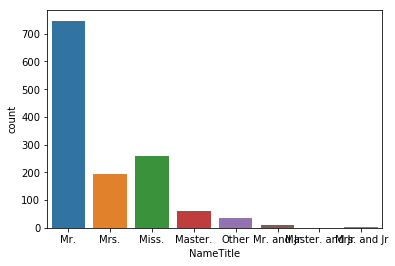

In [893]:
sns.countplot(df.NameTitle)

In [894]:
df.drop('Name',axis=1,inplace=True)


In [895]:
# label encoding 
# pick the classes name as their count is in increasing order

label_ = df.NameTitle.value_counts(dropna=False).index

In [896]:
label_dict = {}
for i, title in enumerate(label_):
    label_dict[title] = i

In [897]:
label_dict

{'Mr.': 0,
 'Miss.': 1,
 'Mrs.': 2,
 'Master.': 3,
 'Other': 4,
 'Mr. and Jr': 5,
 'Mrs. and Jr': 6,
 'Master. and Jr': 7}

In [898]:
df.NameTitle=df.NameTitle.map(label_dict)

# Age

In [899]:
df.Age.isnull().sum()

263

In [900]:
df.Age.dtype

dtype('float64')

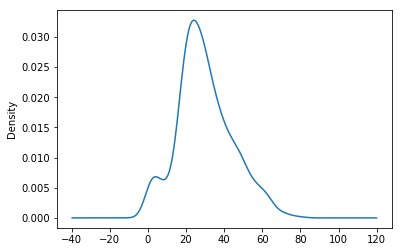

In [901]:
df.Age.plot(kind= 'kde')

In [902]:
df.Age.mean(), df.Age.median()

(29.881137667304014, 28.0)

In [903]:
df.Age = df.Age.fillna(df.Age.median())

## Sex

In [904]:
df.Sex=df.Sex.map({'male':0,'female':1})

# Ticket

In [905]:
df.Ticket.describe(include='all')

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [906]:
df['Ticket_'] = df.Ticket.str.isdigit()

In [907]:
df.Ticket_.value_counts()

True     957
False    352
Name: Ticket_, dtype: int64

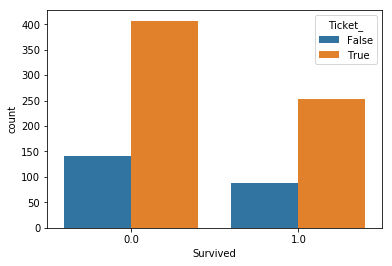

In [908]:
sns.countplot( df.Survived,hue = df.Ticket_)

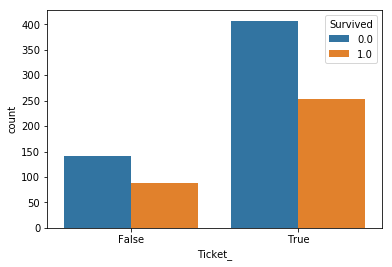

In [909]:
sns.countplot( df.Ticket_,hue=df.Survived)

In [910]:
# Nothing specific information from ticket

# df.drop(columns=[['Ticket','Ticket_']], axis = 1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['Ticket_'], axis=1, inplace=True)

In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age          1309 non-null float64
Cabin        295 non-null object
Embarked     1307 non-null object
Fare         1308 non-null float64
Parch        1309 non-null int64
Sex          1309 non-null int64
SibSp        1309 non-null int64
Survived     891 non-null float64
Pclass_2     1309 non-null uint8
Pclass_3     1309 non-null uint8
NameTitle    1309 non-null int64
dtypes: float64(3), int64(4), object(2), uint8(2)
memory usage: 144.8+ KB


# Cabin

In [912]:
df.Cabin.value_counts(dropna=False).head()

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
B96 B98               4
Name: Cabin, dtype: int64

In [913]:
def picking_cabinType(x):
    if pd.isnull(x):
        return 'Other'
    else:
        return [i[0] for i in x.split()][0]
    

In [914]:
df['CabinType']=df.Cabin.apply(lambda x : picking_cabinType(x))

In [915]:
df.CabinType.value_counts()

Other    1014
C          94
B          65
D          46
E          41
A          22
F          21
G           5
T           1
Name: CabinType, dtype: int64

In [916]:
# as 'other' count is too much, for time being , will remove this feature 

In [917]:
df.drop(columns=['CabinType','Cabin'],axis=1, inplace=True)

# Embarked

In [918]:
df.Embarked.isnull().sum()

2

In [919]:
df.Embarked.mode()[0]

'S'

In [920]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace= True)

In [921]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [922]:
df=categories_to_dummies(['Embarked'], df)

# Fare


In [924]:
df.Fare.fillna(df.Fare.mean(), inplace= True)

In [925]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age           1309 non-null float64
Fare          1309 non-null float64
Parch         1309 non-null int64
Sex           1309 non-null int64
SibSp         1309 non-null int64
Survived      891 non-null float64
Pclass_2      1309 non-null uint8
Pclass_3      1309 non-null uint8
NameTitle     1309 non-null int64
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
dtypes: float64(3), int64(4), uint8(4)
memory usage: 126.9 KB


------

# Feature enfineering is done at initial level.
# lets apply the models  and see it score has increased or not.

In [926]:
df_train_clean = df.iloc[:891,:]
df_test_clean = df.iloc[891:,:]
df_test_clean.drop(columns=['Survived'], inplace=True)

X = df_train_clean.drop(['Survived'], axis= 1)
y = df_train_clean.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [927]:
from  datetime import datetime
start_time = int(datetime.now().strftime('%H%M%S'))

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('ADAboost',AdaBoostClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))


import time 


results = []
names = []

print(f'Name of the model ------- -- R2 score ------------ MSE------------- Time taken')

for name, model in models:
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    res = accuracy_score(y_test, y_pred)
     
   # mse = mean_squared_error(y_test, y_pred)
    #results.append((name,res,mse))
    
    
    current_time = int(datetime.now().strftime('%H%M%S'))
    time_taken = current_time - start_time
    start_time = current_time 
    
    print( f' {name:10} {res:30} {time_taken:15}' )

Name of the model ------- -- R2 score ------------ MSE------------- Time taken
 KNN                    0.7322033898305085               0
 XGB                    0.7966101694915254               0
 ADAboost               0.8033898305084746               1
 DecisionTree              0.735593220338983               0
 RandomForest             0.7830508474576271               0


In [928]:
# Randomized XGB

In [929]:
from sklearn.model_selection import RandomizedSearchCV

In [939]:
model = XGBClassifier()

n_estimators = [100,300,600,900,1200,1500]
max_depth = [2,6,9,12,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.02,0.04,0.08,0.1,0.15,0.2]
min_child_weight = [1,2,3,4,5,6]
base_score = [0.2,0.4,0.6,0.8,1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'booster': booster,
    'base_score': base_score ,
    'min_child_weight':min_child_weight
    
}


random_cv = RandomizedSearchCV(estimator=model,param_distributions=hyperparameter_grid,
                              cv= 5, n_iter = 50,
                              scoring = 'accuracy',
                              n_jobs = 4,
                              verbose = 5,
                              return_train_score = True,
                              random_state= 42)

random_cv.fit(X_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 210 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done 243 out of 250 | elapsed:   16.5s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   17.4s finished


XGBClassifier(base_score=0.6, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [940]:
model = XGBClassifier(base_score=0.6, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=np.nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [941]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8406779661016949

In [949]:
y_pred = model.predict(df_test_clean)
df_sample = pd.read_csv('gender_submission_init.csv')
df_sample.head()
df_sample['Survived'] = np.int64(y_pred)
df_sample.to_csv('gender_submission.csv', index= False)

### Score was 76% on kaggle

------------

# Third Trial

------------

In [75]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [76]:
df = pd.concat([df_train,df_test])

In [77]:
df.drop('PassengerId', axis= 1, inplace=True)

# Sex

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()

In [80]:
df.Sex=le.fit_transform(df.Sex)

# Name


In [81]:
df.Name = df.Name.map(lambda x : x.split(',')[1].split('.')[0].strip())

In [82]:
titles = df.Name.unique()

In [83]:
df.Name.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Jonkheer          1
Don               1
Mme               1
Capt              1
Dona              1
Lady              1
the Countess      1
Sir               1
Name: Name, dtype: int64

In [84]:
# Deleting 'Dona' title which does not exist in train data, only it is in test. 
list(titles).index('Dona')
titles = np.delete(titles,list(titles).index('Dona'))

# Age

In [85]:
df.Age.isnull().sum()

263

In [86]:
df.Age.fillna(-1, inplace=True)

In [87]:
medians = dict()

In [88]:
for title in titles:
#     median = df.Age[(df.Age != -1) & (df.Name == title)].median()
    median = df.Age[(df.Name == title)].median()
    medians[title] = median
    
for index, row in df.iterrows():
    if row['Age'] == -1:
        df.loc[index, 'Age'] = medians[row['Name']]


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int32
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 157.6+ KB


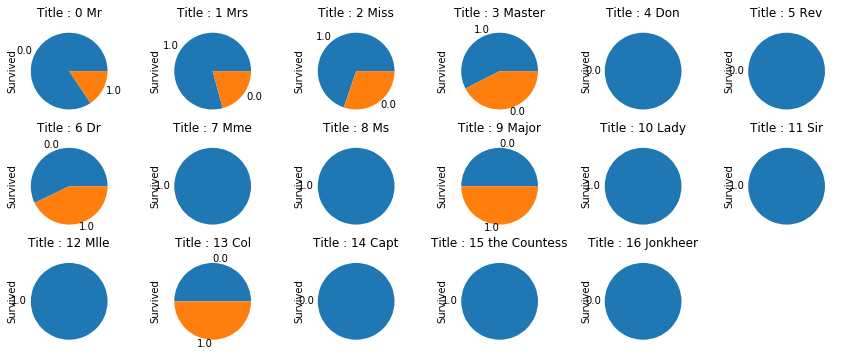

In [90]:
fig = plt.figure(figsize=(15,6))

for i, title in enumerate(titles):
    fig.add_subplot(3, 6, i+1)
    plt.title('Title : {} {}'.format(i,title))
   
    df.Survived[df['Name'] == title].value_counts().plot.pie()
    

In [91]:
# to have better picture about the survival rate for each 'title', lets apply groupby
top_survival = df.groupby('Name')['Survived'].agg({'Sum':'sum','Count':'count', 'mean':'mean'}).sort_values(by='mean', ascending = False)
top_survival

,Sum,Count,mean
Name,,,
the Countess,1.0,1,1.000000
Mlle,2.0,2,1.000000
Sir,1.0,1,1.000000
Ms,1.0,1,1.000000
Lady,1.0,1,1.000000
Mme,1.0,1,1.000000
Mrs,99.0,125,0.792000
Miss,127.0,182,0.697802
Master,23.0,40,0.575000


In [92]:
encode_7 = top_survival[top_survival.iloc[:,2]==1].index.values

In [93]:
encode_6 = top_survival[(top_survival.iloc[:,2]>0.75) & (top_survival.iloc[:,2]<0.80) ].index.values

In [94]:
encode_5 = top_survival[(top_survival.iloc[:,2]>0.65) & (top_survival.iloc[:,2]<0.75) ].index.values

In [95]:
encode_4 = top_survival[(top_survival.iloc[:,2]>0.49) & (top_survival.iloc[:,2]<0.65) ].index.values

In [96]:
encode_3 = top_survival[(top_survival.iloc[:,2]>0.20) & (top_survival.iloc[:,2]<0.49) ].index.values

In [97]:
encode_2 = top_survival[(top_survival.iloc[:,2]>0.10) & (top_survival.iloc[:,2]<0.20) ].index.values

In [98]:
encode_1 = top_survival[ (top_survival.iloc[:,2]<0.10) ].index.values

In [99]:
encode_7

array(['the Countess', 'Mlle', 'Sir', 'Ms', 'Lady', 'Mme'], dtype=object)

In [100]:
# below code make a dictinary to have label encoder for each name or title. 
#weightage is decided on the basis of how much probabylty for each title( calculated above)

encode_d ={}
for i in range(7):
    a = 'encode_'+str(i+1)
#     print(i+1,len(eval(a)))
    for j in eval(a):
#         print(j)
        encode_d[j] = (i+1)     

In [101]:
encode_d['Dona'] = 1  # just added for one entry
encode_d

{'Jonkheer': 1,
 'Rev': 1,
 'Don': 1,
 'Capt': 1,
 'Mr': 2,
 'Dr': 3,
 'Master': 4,
 'Col': 4,
 'Major': 4,
 'Miss': 5,
 'Mrs': 6,
 'the Countess': 7,
 'Mlle': 7,
 'Sir': 7,
 'Ms': 7,
 'Lady': 7,
 'Mme': 7,
 'Dona': 1}

In [102]:
df.Name.isnull().sum()

0

In [103]:
df.Name = df.Name.map(encode_d)

In [104]:
# df.Name.fillna(df.Name.mode()[0], inplace=True)

In [105]:
from sklearn.preprocessing import MinMaxScaler
df['Name'] = MinMaxScaler().fit_transform(df['Name'].values.reshape(-1,1))

In [106]:
df['Age'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(-1,1))

In [107]:
df.Fare = df.Fare.fillna(df.Fare.mean())

In [108]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int32
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(4), int32(1), int64(3), object(3)
memory usage: 157.6+ KB


In [110]:
df['Pclass'] = MinMaxScaler().fit_transform(df['Pclass'].values.reshape(-1,1))

In [117]:
df.Parch.isnull().sum()

0

In [114]:
df.groupby('Parch')['Survived'].agg({'Total':'count','Mean':'mean'}).sort_values(by='Mean', ascending= False)

,Total,Mean
Parch,,
3,5,0.600000
1,118,0.550847
2,80,0.500000
0,678,0.343658
5,5,0.200000
4,4,0.000000
6,1,0.000000
9,0,NaN


In [115]:
df[df.Parch==9] # lets 9 should give 0 label

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
342,0.308872,NaN,S,69.55,0.166667,9,1.0,1,1,NaN,CA. 2343
365,0.409399,NaN,S,69.55,0.833333,9,1.0,0,1,NaN,CA. 2343


In [116]:
replacement = {
    9: 0,
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}

df['Parch'] = df['Parch'].apply(lambda x: replacement.get(x))
df['Parch'] = MinMaxScaler().fit_transform(df['Parch'].values.reshape(-1, 1))
# df_test_clean.Parch=df_test_clean.Parch.fillna(df.Parch.mean())

In [118]:
df.drop('Ticket', axis=1, inplace=True)


In [119]:
df.groupby('Embarked')['Survived'].agg({'Total':'count','Mean':'mean'}).sort_values(by='Mean', ascending= False)

,Total,Mean
Embarked,,
C,168,0.553571
Q,77,0.389610
S,646,0.339009


In [120]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

df['Embarked'] = df['Embarked'].apply(lambda x: replacement.get(x))
df['Embarked'] = MinMaxScaler().fit_transform(df['Embarked'].values.reshape(-1, 1))


In [121]:
df.groupby('SibSp')['Survived'].agg({'Total':'count','Mean':'mean'}).sort_values(by='Mean', ascending= False)

,Total,Mean
SibSp,,
1,209,0.535885
2,28,0.464286
0,608,0.345395
3,16,0.250000
4,18,0.166667
5,5,0.000000
8,7,0.000000


In [122]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

df['SibSp'] = df['SibSp'].apply(lambda x: replacement.get(x))
df['SibSp'] = MinMaxScaler().fit_transform(df['SibSp'].values.reshape(-1, 1))


In [123]:
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

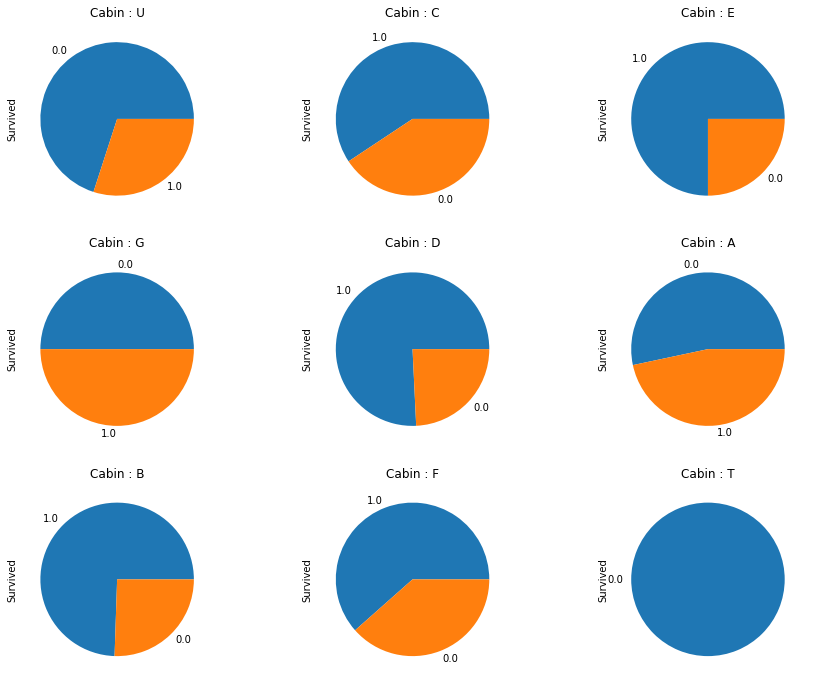

In [124]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in df['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    df.Survived[df['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [125]:
df.groupby('Cabin')['Survived'].agg({'Total':'count','Mean':'mean'}).sort_values(by='Mean', ascending= False)

,Total,Mean
Cabin,,
D,33,0.757576
E,32,0.750000
B,47,0.744681
F,13,0.615385
C,59,0.593220
G,4,0.500000
A,15,0.466667
U,687,0.299854
T,1,0.000000


In [126]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

df['Cabin'] = df['Cabin'].apply(lambda x: replacement.get(x))
df['Cabin'] = MinMaxScaler().fit_transform(df['Cabin'].values.reshape(-1, 1))


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age         1309 non-null float64
Cabin       1309 non-null float64
Embarked    1309 non-null float64
Fare        1309 non-null float64
Name        1309 non-null float64
Parch       1309 non-null float64
Pclass      1309 non-null float64
Sex         1309 non-null int32
SibSp       1309 non-null float64
Survived    891 non-null float64
dtypes: float64(9), int32(1)
memory usage: 147.4 KB


## Feature engineering done for 3rd trial

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
df_train_clean = df.iloc[:891,:]
df_test_clean = df.iloc[891:,:]
df_test_clean.drop(columns=['Survived'], inplace=True)

X = df_train_clean.drop(['Survived'], axis= 1)
y = df_train_clean.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [133]:
from  datetime import datetime
start_time = int(datetime.now().strftime('%H%M%S'))

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('ADAboost',AdaBoostClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))


import time 


results = []
names = []

print(f'Name of the model ------- -- R2 score ------------ MSE------------- Time taken')

for name, model in models:
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    res = accuracy_score(y_test, y_pred)
     
   # mse = mean_squared_error(y_test, y_pred)
    #results.append((name,res,mse))
    
    
    current_time = int(datetime.now().strftime('%H%M%S'))
    time_taken = current_time - start_time
    start_time = current_time 
    
    print( f' {name:10} {res:30} {time_taken:15}' )

Name of the model ------- -- R2 score ------------ MSE------------- Time taken
 KNN                    0.7597765363128491               0
 XGB                    0.7932960893854749               1
 ADAboost               0.7932960893854749               0
 DecisionTree             0.7821229050279329               0
 RandomForest             0.8268156424581006               0


In [134]:
from sklearn.neural_network import MLPClassifier

In [135]:
models = [
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
    MLPClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.8100558659217877
0.7877094972067039


In [138]:
# another trial with randomsearchcv ( XGB)

model = XGBClassifier()

n_estimators = [100,300,600,900,1200,1500]
max_depth = [2,6,9,12,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.02,0.04,0.08,0.1,0.15,0.2]
min_child_weight = [1,2,3,4,5,6]
base_score = [0.2,0.4,0.6,0.8,1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'booster': booster,
    'base_score': base_score ,
    'min_child_weight':min_child_weight
    
}


random_cv = RandomizedSearchCV(estimator=model,param_distributions=hyperparameter_grid,
                              cv= 5, n_iter = 50,
                              scoring = 'accuracy',
                              n_jobs = 4,
                              verbose = 5,
                              return_train_score = True,
                              random_state= 42)

random_cv.fit(X_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 210 tasks      | elapsed:   23.6s
[Parallel(n_jobs=4)]: Done 243 out of 250 | elapsed:   24.7s remaining:    0.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   25.5s finished


XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
model = XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=np.nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8212290502793296

In [141]:
# RandomSearchCV with Randomforest


model = RandomForestClassifier()

n_estimators = [100,300,600,900,1200,1500]
max_depth = [2,6,9,12,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.02,0.04,0.08,0.1,0.15,0.2]
min_child_weight = [1,2,3,4,5,6]
base_score = [0.2,0.4,0.6,0.8,1]
max_feature = ['auto','sqrt','log2']
min_samples_leaf=[2,5,10,15,20]
min_samples_split=[2,5,10,15,20]

grid_param = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
   
    'min_samples_leaf' : min_samples_leaf,
    'min_samples_split': min_samples_split,
   
 
    'max_features' : max_feature
}

random_cv = RandomizedSearchCV(estimator=model,param_distributions=grid_param,
                              cv= 5, n_iter = 50,
                              scoring = 'accuracy',
                              n_jobs = 4,
                              verbose = 5,
                              return_train_score = True,
                              random_state= 42)


random_cv.fit(X_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  4.0min finished


RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=15,
                       n_estimators=1500)

In [160]:
model = RandomForestClassifier(max_depth=15, min_samples_leaf=3,max_features='sqrt', min_samples_split=20,
                       n_estimators=4000)

In [161]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8379888268156425

In [151]:
y_pred = model.predict(df_test_clean)
df_sample = pd.read_csv('gender_submission_init.csv')
df_sample.head()
df_sample['Survived'] = np.int64(y_pred)
df_sample.to_csv('gender_submission.csv', index= False)

In [1247]:
# Trying with ANN

In [162]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam, SGD

In [163]:
early_stop = EarlyStopping( monitor='val_loss',verbose=1, patience=30)

In [164]:
ann = Sequential()
ann.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu', input_dim = 9))

ann.add(Dense(units=25,kernel_initializer = 'he_uniform', activation='relu'))

ann.add(Dense(units=50,kernel_initializer = 'he_uniform', activation='relu'))

ann.add(Dense(units=1,kernel_initializer = 'he_uniform', activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])



ann.fit(X_train,y_train,epochs= 1000, validation_data=(X_test,y_test), batch_size=10, callbacks=[early_stop])

Epoch 1/1000
72/72 [==============================] - 1s 7ms/step - loss: 2.2660 - accuracy: 0.5744 - val_loss: 0.6130 - val_accuracy: 0.6983
Epoch 2/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6503 - val_loss: 0.8599 - val_accuracy: 0.6927
Epoch 3/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6699 - val_loss: 0.5488 - val_accuracy: 0.7039
Epoch 4/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.6742 - val_loss: 0.5779 - val_accuracy: 0.7207
Epoch 5/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6756 - val_loss: 0.5525 - val_accuracy: 0.7039
Epoch 6/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.7121 - val_loss: 0.5140 - val_accuracy: 0.7207
Epoch 7/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.6388 - accuracy: 0.7079 - val_loss: 0.5728 - val_accuracy: 0.7542
Epoch 

72/72 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8034 - val_loss: 0.4401 - val_accuracy: 0.7821
Epoch 59/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7963 - val_loss: 0.4560 - val_accuracy: 0.7877
Epoch 60/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.4655 - accuracy: 0.7978 - val_loss: 0.4354 - val_accuracy: 0.7821
Epoch 61/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.7978 - val_loss: 0.4752 - val_accuracy: 0.7821
Epoch 62/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8006 - val_loss: 0.4427 - val_accuracy: 0.8045
Epoch 63/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8034 - val_loss: 0.4628 - val_accuracy: 0.7933
Epoch 64/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.8006 - val_loss: 0.4466 - val_accuracy: 0.7933
Epoch 65/1000

Epoch 115/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8272 - val_loss: 0.4458 - val_accuracy: 0.7989
Epoch 116/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8202 - val_loss: 0.4840 - val_accuracy: 0.7821
Epoch 117/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8118 - val_loss: 0.4375 - val_accuracy: 0.8101
Epoch 118/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8301 - val_loss: 0.4490 - val_accuracy: 0.7989
Epoch 119/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8357 - val_loss: 0.4461 - val_accuracy: 0.8045
Epoch 120/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8357 - val_loss: 0.4410 - val_accuracy: 0.7989
Epoch 121/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8146 - val_loss: 0.5051 - val_accuracy:

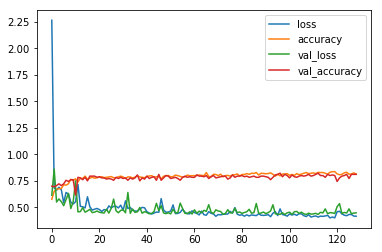

In [165]:
pd.DataFrame(ann.history.history).plot()

In [166]:
ann.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8101


[0.44660136103630066, 0.8100558519363403]

In [173]:
y_pred = ann.predict(df_test_clean.values)

In [180]:
y_pred=np.where(y_pred>0.5,1,0) 

In [181]:
df_sample = pd.read_csv('gender_submission_init.csv')
df_sample.head()
df_sample['Survived'] = np.int64(y_pred)
df_sample.to_csv('gender_submission.csv', index= False)

In [182]:
# score 76.55%

In [1263]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1257]:
# with kerasclassifier hyperparameter tuning

In [ ]:
# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# Below code includes all the possible hyperparameter which would be tuned.


early_stop = EarlyStopping( monitor='val_loss',verbose=1, patience=40)

def create_model(optimizer='SGD',activation='relu',neurons= 25, init_mode='uniform', learn_rate= 0.01, loss = 'mean_squared_error', drop_out= 0.5):
    # define model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation, input_dim=9)) 
    model.add(Dropout(drop_out))
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(1, kernel_initializer=init_mode,activation='sigmoid'))
    # compile model
    opt = SGD(learning_rate=learn_rate)
    model.compile(loss=loss,
              optimizer=opt,
              metrics=['accuracy'])
    return model



# %%time

model_CV = KerasRegressor(build_fn=create_model, verbose=1,)

seed = 7
np.random.seed(seed)

# define the grid search parameters

batch_size = [ 20 , 40,80]
epochs = [200,600,800]
drop_out = [0.1,0.2,0.5]
# patience = [10,20]

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
loss = [ 'binary_crossentropy']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
neurons = [ 10,30,50]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# activation = ['softmax', 'relu','hard_sigmoid', 'linear']
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]


param_grid = dict(optimizer=optimizer,init_mode=init_mode,learn_rate=learn_rate ,loss = loss,drop_out=drop_out,epochs=epochs, 
                           batch_size=batch_size,neurons=neurons, activation=activation)


# grid = RandomizedSearchCV(estimator=model_CV, param_distributions=param_grid, n_jobs=-1, cv=3)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=5)


grid_result = grid.fit(X_train, y_train, validation_data=(X_test,y_test), callbacks=[early_stop])


# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')


## Fourth trial

In [210]:
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 50,
    'figure.figsize': [15, 7]
}
plot.rcParams.update(params)

In [232]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [233]:
df=pd.concat([df_train, df_test])

In [234]:
df.shape

(1309, 12)

In [235]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [236]:
# Feature engineering

In [237]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
titles

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [238]:


Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

    # we extract the title from each name
df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
df['Title'] = df.Title.map(Title_Dictionary)


In [240]:
df['Title'].value_counts(dropna = False)

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      5
NaN          1
Name: Title, dtype: int64

In [248]:
grouped_train_median_age = df.groupby(['Sex','Pclass','Title']).median().reset_index()[['Sex','Pclass','Title','Age']]
grouped_train_median_age.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,43.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,20.5


In [258]:
def fill_age(row):
    condition = (
        (grouped_train_median_age['Sex'] == row['Sex']) & 
        (grouped_train_median_age['Title'] == row['Title']) & 
        (grouped_train_median_age['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global df
    # a function that fills the missing values of the Age variable
    df['Age'] = df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis = 1)
    return df

df = process_age()

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1308 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 183.2+ KB


In [262]:
df.drop('Name', axis=1, inplace=True)


In [263]:
titles_dummies = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, titles_dummies], axis=1)


In [264]:
df.drop('Title', axis=1, inplace=True)


In [266]:
df.Fare.fillna(df.iloc[:891].Fare.mean(), inplace=True)


In [267]:
df.Embarked.fillna('S', inplace=True)


In [268]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)


In [269]:
df.Cabin.fillna('U', inplace=True)


In [270]:
df['Cabin'] = df['Cabin'].map(lambda c: c[0])


In [271]:
cabin_dummies = pd.get_dummies(df['Cabin'], prefix='Cabin')    
df = pd.concat([df, cabin_dummies], axis=1)
df.drop('Cabin', axis=1, inplace=True)


In [272]:
df['Sex'] = df['Sex'].map({'male':1, 'female':0})


In [274]:
pclass_dummies = pd.get_dummies(df['Pclass'], prefix="Pclass")
df = pd.concat([df, pclass_dummies],axis=1)
df.drop('Pclass',axis=1,inplace=True)


In [303]:
def clean_Ticket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [307]:
df['Ticket'] = df['Ticket'].map(clean_Ticket)

In [311]:
df.Ticket.value_counts().head()

XXX        957
PC          92
CA          68
A5          28
SOTONOQ     24
Name: Ticket, dtype: int64

In [312]:
tickets_dummies = pd.get_dummies(df['Ticket'], prefix='Ticket')
df = pd.concat([df, tickets_dummies], axis=1)
df.drop('Ticket', inplace=True, axis=1)

In [313]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

In [314]:
df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

In [318]:
df.drop('PassengerId', inplace=True, axis=1)

In [319]:
df_train_clean = df.iloc[:891,:]
df_test_clean = df.iloc[891:,:]
df_test_clean.drop(columns=['Survived'], inplace=True)

X = df_train_clean.drop(['Survived'], axis= 1)
y = df_train_clean.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [321]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [322]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

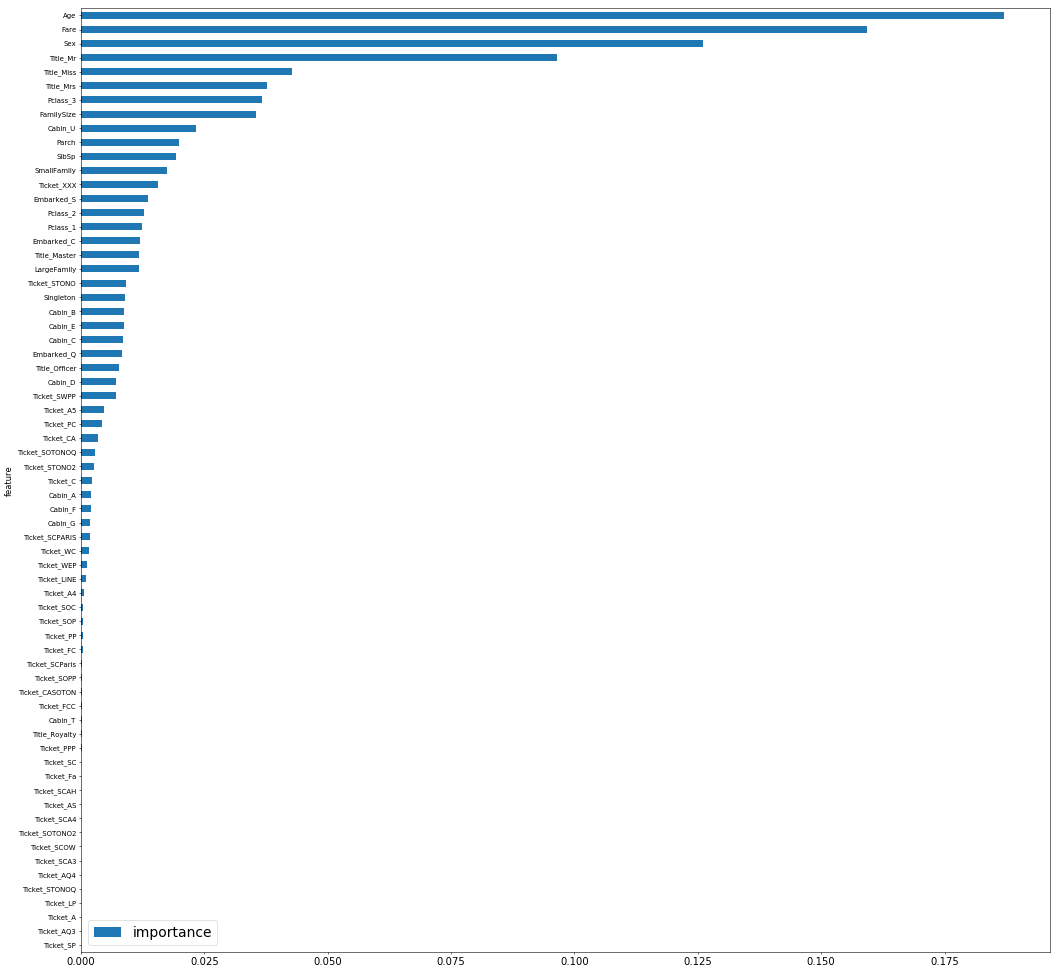

In [324]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [326]:
model = SelectFromModel(clf, prefit=True)
X_train_reduced = model.transform(X_train)
print(X_train_reduced.shape)
# (891L, 14L)

X_test_reduced = model.transform(X_test)
print(X_test_reduced.shape)

(712, 13)
(179, 13)


In [338]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation score')
    score = compute_score(clf=model, X=X_train_reduced, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation score
CV score = 0.8229981286319313
****
Cross-validation score
CV score = 0.8258051807347583
****
Cross-validation score
CV score = 0.8131980695360976
****
Cross-validation score
CV score = 0.8258347286516301
****


In [331]:
parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1,
                           n_jobs=-1
                               
                              )

grid_search.fit(X_train, y_train)
model = grid_search
parameters = grid_search.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   42.1s finished


In [335]:
y_pred=model.predict(df_test_clean)

In [336]:
model.best_score_

0.8426770412685907

In [337]:

df_sample = pd.read_csv('gender_submission_init.csv')
df_sample.head()
df_sample['Survived'] = np.int64(y_pred)
df_sample.to_csv('gender_submission.csv', index= False)

# score 0.78468

---- 

# fifth trial

In [343]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df=pd.concat([df_train, df_test])

In [344]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [342]:
d

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        